In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/DLS/project/packages')

import train
import dataset
import models
import load_datasets

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch import nn
from torch.nn import functional as F
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

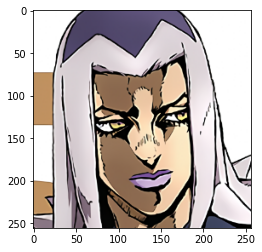

In [ ]:
from matplotlib.pyplot import imshow
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(300),
    transforms.RandomCrop(256),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomHorizontalFlip(),
])

load_datasets.real2jojo()
!unzip -q real2jojo.zip

dataset_jojo = dataset.FolderDataSet("./real2jojo/jojo_faces", transform=transform)
dataloader_jojo = torch.utils.data.DataLoader(dataset_jojo, batch_size = 1, shuffle=True)
imshow(torchvision.transforms.ToPILImage()(dataset.de_norm(dataset_jojo[0])))

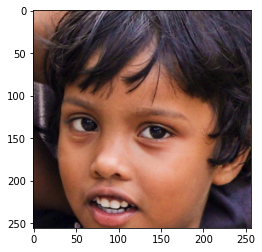

In [ ]:
dataset_real = dataset.FolderDataSet("./real2jojo/real_faces", transform=transform)
dataloader_real = torch.utils.data.DataLoader(dataset_real, batch_size = 1, shuffle=True)
imshow(torchvision.transforms.ToPILImage()(dataset.de_norm(dataset_real[0])))

In [ ]:
from itertools import chain
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
pool_images = models.Buffer(device, 50)
pool_targets = models.Buffer(device, 50)
gan = models.CycleGAN(lambd = 2, resnet_layers = 9, device = device, buffer_images=pool_images, buffer_targets=pool_targets, dim_gen = 32, dropout = 0.5)
gan.to(device)
opt_descriminator = torch.optim.Adam(params = chain(gan.gan_straight.descriminator.parameters(), gan.gan_inverse.descriminator.parameters()), lr = 2e-4, betas=(0.5, 0.999))
opt_generator = torch.optim.Adam(params = chain(gan.gan_straight.generator.parameters(), gan.gan_inverse.generator.parameters()), lr = 2e-4, betas=(0.5, 0.999))
sch_descr = torch.optim.lr_scheduler.LambdaLR(opt_descriminator, lr_lambda = lambda n: 1 - (n-100)/100 if n > 100 else 1)
sch_gen = torch.optim.lr_scheduler.LambdaLR(opt_generator, lr_lambda = lambda n: 1 - (n-100)/100 if n > 100 else 1)

/content/drive/MyDrive/DLS/project/packages/models.py:9: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  torch.nn.init.normal(x.weight, m, s)


In [ ]:
def save(path):
    torch.save({
            'gan_state_dict': gan.state_dict(),
            'opt_d_state_dict': opt_descriminator.state_dict(),
            'opt_g_state_dict': opt_generator.state_dict(),
            'sch_descr_state_dict': sch_descr.state_dict(),
            'sch_gen_state_dict': sch_gen.state_dict(),
            }, path)
path = '/content/drive/MyDrive/DLS/project/real2jojo_weights'

Epoch: 40


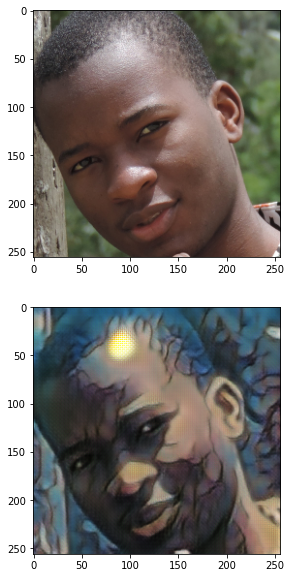

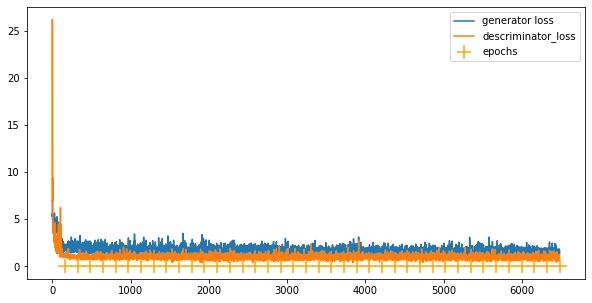

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
train.train(gan, dataloader_real, dataloader_jojo, dataloader_real, opt_generator, opt_descriminator, device, sch_gen, sch_descr, 40)
save(path)

Epoch: 40


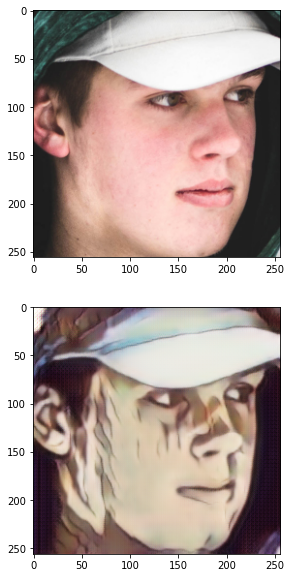

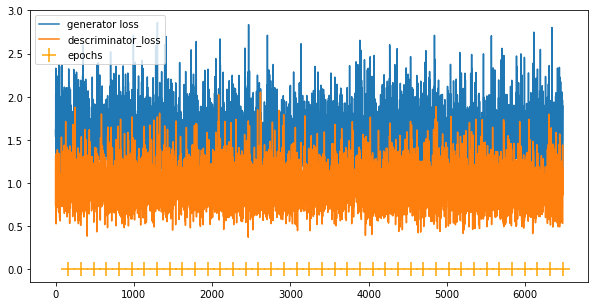

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
train.train(gan, dataloader_real, dataloader_jojo, dataloader_real, opt_generator, opt_descriminator, device, sch_gen, sch_descr, 40)
save(path)

Epoch: 40


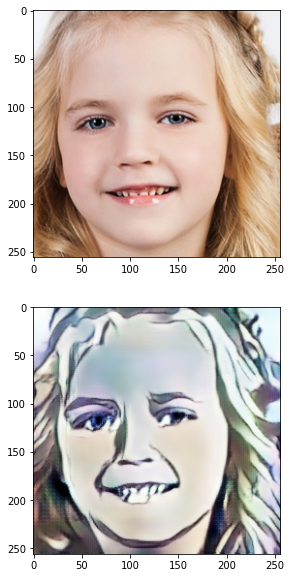

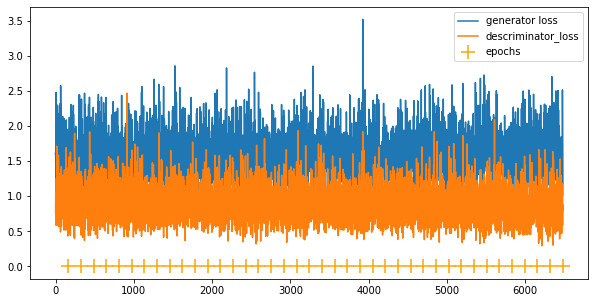

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
train.train(gan, dataloader_real, dataloader_jojo, dataloader_real, opt_generator, opt_descriminator, device, sch_gen, sch_descr, 40)
save(path)

Epoch: 40


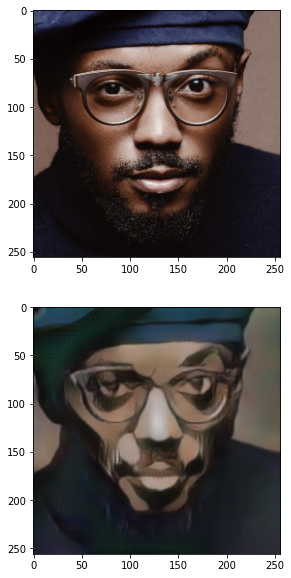

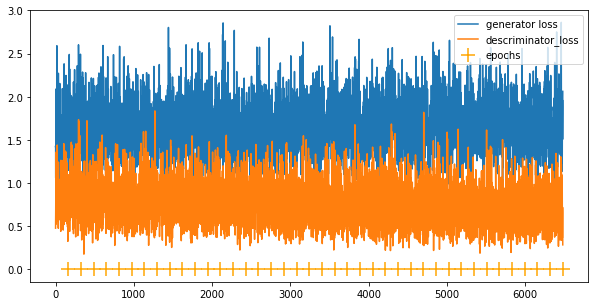

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
train.train(gan, dataloader_real, dataloader_jojo, dataloader_real, opt_generator, opt_descriminator, device, sch_gen, sch_descr, 40)
save(path)

Epoch: 40


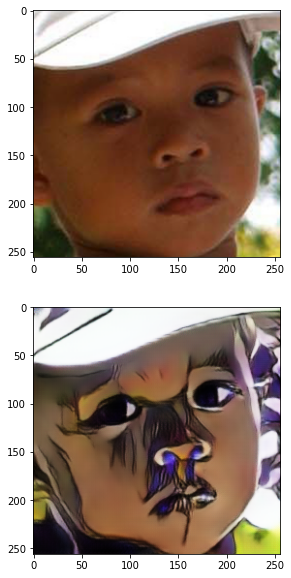

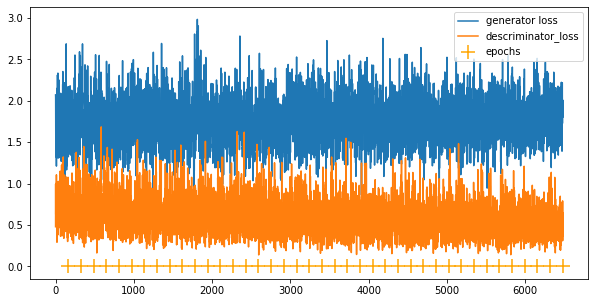

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [ ]:
train.train(gan, dataloader_real, dataloader_jojo, dataloader_real, opt_generator, opt_descriminator, device, sch_gen, sch_descr, 40)
save(path)